## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import csv

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouse_list = mouse_df["Mouse ID"]
print(f'There are {len(mouse_list.unique())} unique "Mouse IDs".')
mouse_list.value_counts()


There are 249 unique "Mouse IDs".


g989    13
j296    10
a685    10
f545    10
l725    10
        ..
h428     1
x226     1
l872     1
t573     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Add 'Duplicate_Check' column to mouse_df.  True = duplicated on 'Mouse ID' and 'Timepoint'.
mouse_df['Duplicate_Check'] = mouse_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)

# Create a df of duplicates ('duplicate_df')
duplicates = mouse_df['Duplicate_Check'].isin([True])
duplicate_df = mouse_df[duplicates]

# Check if there are multiple duplicates by create list of unique 'Mouse IDs' in duplicate_df
unique_dup_mice = duplicate_df["Mouse ID"].unique()
print(f'List of duplicate mice: {unique_dup_mice}')

# Store the "mouse_ID" of the duplicate in a variable
mouse_to_remove = unique_dup_mice[0]
print(f'"{mouse_to_remove}" is the only mouse with duplicate results. This mouse is to be removed from dataset.')



List of duplicate mice: ['g989']
"g989" is the only mouse with duplicate results. This mouse is to be removed from dataset.


In [6]:
# Optional: Get all the data for the duplicate mouse ID.

results_for_dup_mouse = mouse_df.loc[mouse_df['Mouse ID'] == mouse_to_remove]

results_for_dup_mouse_df = results_for_dup_mouse[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

results_for_dup_mouse_df.reset_index(drop=True, inplace=True)
results_for_dup_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
reduced_mouse_df = mouse_df.loc[mouse_df['Mouse ID'] != 'g989']

# remove Duplicate_Check column
reduced_mouse_df = reduced_mouse_df[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

In [12]:
# Checking the number of mice in the clean DataFrame.
reduced_mouse_list = reduced_mouse_df["Mouse ID"]
print(f'There are {len(reduced_mouse_list.unique())} unique "Mouse IDs".')

There are 248 unique "Mouse IDs".


## Summary Statistics

In [14]:
reduced_mouse_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [67]:
#--------------------------------------------
# DELETE THIS CELL.  TEST CELL ONLY TO EXPORT TO CSV FOR VIEWING AND DISPLAY DF
#--------------------------------------------
reduced_mouse_df.to_csv('reduced_mouse_df.csv')
reduced_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_statistics_df = reduced_mouse_df.groupby(["Drug Regimen"])

mean_results = summary_statistics_df["Tumor Volume (mm3)"].mean()
median_results = summary_statistics_df["Tumor Volume (mm3)"].median()
variance_results = summary_statistics_df["Tumor Volume (mm3)"].var()
std_dev_results = summary_statistics_df["Tumor Volume (mm3)"].std()
sem_results = summary_statistics_df["Tumor Volume (mm3)"].sem()

summary_statistics_output_df = pd.DataFrame(
    {"Mean": mean_results,
     "Median": median_results,
     "Variance": variance_results,
     "Std Dev": std_dev_results,
     "SEM": sem_results,
    }
)

summary_statistics_output_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


In [86]:
# reduced_mouse_df
summary_statistics_output_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [87]:

Capomulin_count = summary_statistics_output_df["Drug Regimen"].count()
# Ceftamin_count = 
# Infubinol_count = 
# Ketapril_count = 
# Naftisol_count = 
# Placebo_count = 
# Propriva_count = 
# Ramicane_count = 
# Stelasyn_count = 
# Zoniferol_count = 

Capomulin_count


In [ ]:
df.aggregate(['value_counts'])

## Bar and Pie Charts

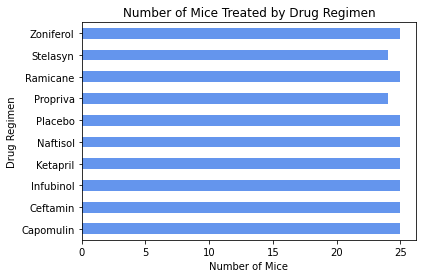

In [174]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

df = pd.DataFrame({'Regimen':["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
 'count':[25, 25, 25, 25, 25, 25, 24, 25, 24, 25]})

ax = df.plot.barh(x='Regimen', y='count', rot=0, legend=False, title="Number of Mice Treated by Drug Regimen", color='cornflowerblue')
ax.set(xlabel="Number of Mice", ylabel="Drug Regimen")

plt.savefig("Mouse_Treatment_bar_chart_pandas.png")

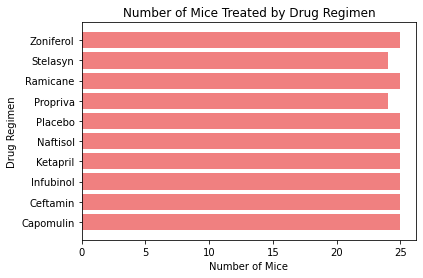

In [176]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
y_axis = [25, 25, 25, 25, 25, 25, 24, 25, 24, 25]

plt.barh(x_axis, y_axis, color='lightcoral', alpha=1, align="center")

plt.title("Number of Mice Treated by Drug Regimen")
plt.xlabel("Number of Mice")
plt.ylabel("Drug Regimen")

plt.savefig("Mouse_Treatment_bar_chart_pyplot.png")


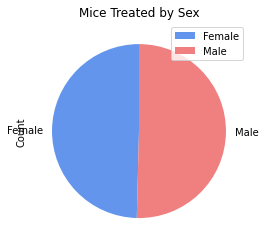

In [231]:

pandas_pie_df = pd.DataFrame({'Sex': ['Male', 'Female'],
                   'Count': [125, 123]})

pandas_pie_df.groupby(['Sex']).sum().plot(kind='pie', y='Count', x='Sex',
                                colors = ['cornflowerblue', 'lightcoral'],
                                title='Mice Treated by Sex',
                                startangle=90)

plt.savefig("Mouse_Treatment_pie_chart_pandas.png")


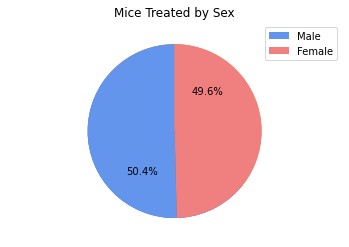

In [223]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
counts = [125, 123]

plt.pie(counts, autopct="%1.1f%%", startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

colors = ['cornflowerblue', 'lightcoral']
counts, texts = plt.pie(counts, colors=colors, startangle=90)

plt.legend(counts, labels, loc="best")

plt.title("Mice Treated by Sex")
plt.savefig("Mouse_Treatment_pie_chart_pyplot.png")
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
